In [1]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt

In [2]:
x, y = datasets.load_svmlight_file('./housing_scale.csv', n_features=13)
xs_train, xs_val, ys_train, ys_val = model_selection.train_test_split(x, y, test_size=0.25)

xs_train = xs_train.A # numpy
xs_val = xs_val.A

xs_train = np.c_[xs_train, np.ones(len(xs_train))] # +1
xs_val = np.c_[xs_val, np.ones(len(xs_val))]

In [3]:
def getLoss(xs, ys):
    loss = 0
    grad = 0
    for x, y in zip(xs, ys):
        y_calc = W.T.dot(x)
        loss += (y_calc - y) ** 2 # 均方
        grad += (y_calc - y) * x # 梯度
    loss /= len(xs)
    grad = grad.reshape(-1, 1)
    return loss, grad

In [4]:
# [0, 1) 内随机初始化
W = np.random.random([14, 1])
lr = 1e-3

losses_train, losses_val = [], []

for epoch in range(50):
    loss_train, grad = getLoss(xs_train, ys_train)
    W = W - lr * grad # 全批次梯度下降
    
    loss_val, _ = getLoss(xs_val, ys_val)
    losses_train.append(loss_train)
    losses_val.append(loss_val)
    
    print("epoch ", epoch + 1, ": loss_train: ", loss_train, " loss_val: ", loss_val)

epoch  1 : loss_train:  [681.09287812]  loss_val:  [485.35472149]
epoch  2 : loss_train:  [486.00018461]  loss_val:  [351.52366773]
epoch  3 : loss_train:  [354.76102265]  loss_val:  [265.5393933]
epoch  4 : loss_train:  [262.40768111]  loss_val:  [198.77048921]
epoch  5 : loss_train:  [196.63822267]  loss_val:  [155.52879053]
epoch  6 : loss_train:  [149.58228003]  loss_val:  [120.06277197]
epoch  7 : loss_train:  [115.79908492]  loss_val:  [98.75960806]
epoch  8 : loss_train:  [91.45602488]  loss_val:  [79.2746337]
epoch  9 : loss_train:  [73.84048248]  loss_val:  [68.92161648]
epoch  10 : loss_train:  [61.02928327]  loss_val:  [57.84079281]
epoch  11 : loss_train:  [51.65736521]  loss_val:  [52.88098721]
epoch  12 : loss_train:  [44.75464493]  loss_val:  [46.33742913]
epoch  13 : loss_train:  [39.63075967]  loss_val:  [44.00412816]
epoch  14 : loss_train:  [35.79358248]  loss_val:  [39.98631716]
epoch  15 : loss_train:  [32.89159055]  loss_val:  [38.91401326]
epoch  16 : loss_train:

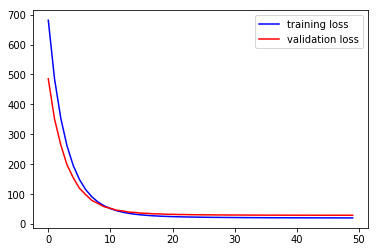

In [5]:
plt.plot([i for i in range(len(losses_train))], losses_train, 'b')
plt.plot([i for i in range(len(losses_val))], losses_val, 'r')
plt.legend(["training loss","validation loss"])
plt.savefig('./lab_1_2_1.pdf')
plt.show()